In [9]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import OPTAMI as opt
import time
import matplotlib.pyplot as plt
import math

In [10]:
train_dataset = dsets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dsets.MNIST(root='./data', train=False, transform=transforms.ToTensor())
train_dataset = torch.utils.data.Subset(train_dataset, range(1000))

In [11]:
batch_size = 100
input_dim = 784
output_dim = 2

In [12]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [14]:
model = LogisticRegression(input_dim, output_dim).cuda()
criterion = torch.nn.CrossEntropyLoss()
with torch.no_grad():
    for i, param in enumerate(model.parameters()):
        param.zero_()


def logreg_fit(optimizer_full, train_loader, model, epochs, gamma):
    optimizer = optimizer_full
    losses = []

    s1 = time.time()
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            # get the inputs; data is a list of [inputs, labels]
            if i == 0:
                image = Variable(images.view(-1, 28 * 28)).cuda()
                label = Variable(labels).fmod(2).cuda()

                def closure():
                    optimizer.zero_grad()
                    loss_ = criterion(model(image), label)
                    if gamma > 0.:
                        for j, param in enumerate(model.parameters()):
                            loss_ += param[j].square().sum().mul(gamma)
                    return loss_
                func_loss = closure().item()
                print('loss=', func_loss)
                losses.append(func_loss)
                optimizer.step(closure)
    total_time = time.time() - s1
    return losses, total_time

In [15]:
epochs= 100
gamma = 0.

In [16]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()

optimizer = opt.higher_order.BasicTensorMethod(model.parameters(), L = 4.)
loss_BTM_lazy = []
every_iter = 784
s1 = time.time()
k = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        # if i == 0:
        image = Variable(images.view(-1, 28 * 28)).cuda()
        label = Variable(labels).fmod(2).cuda()

        def closure():
            optimizer.zero_grad()
            loss_ = criterion(model(image), label)
            if gamma > 0.:
                for j in range(len(list(model.parameters()))):
                    loss_ += list(model.parameters())[j].square().sum().mul(gamma)

            return loss_

        func_loss = closure().item()
        loss_BTM_lazy.append(func_loss)
        hess = (k % every_iter) == 0
        optimizer.step(closure, hess)
        k += 1
    print('loss=', func_loss)

total_time_BTM_lazy = time.time() - s1

loss= 0.5016939043998718
loss= 0.3751595616340637
loss= 0.36990898847579956
loss= 0.3319644033908844
loss= 0.348476767539978
loss= 0.32527461647987366
loss= 0.3391804099082947
loss= 0.29791060090065
loss= 0.3145793676376343
loss= 0.29870399832725525
loss= 0.28853148221969604
loss= 0.23971721529960632
loss= 0.2495359182357788
loss= 0.2363465428352356
loss= 0.2580811679363251
loss= 0.2395796924829483
loss= 0.21933546662330627
loss= 0.23586973547935486
loss= 0.2122722864151001
loss= 0.22302335500717163
loss= 0.23080973327159882
loss= 0.179965540766716
loss= 0.212773397564888
loss= 0.19772610068321228
loss= 0.18015462160110474
loss= 0.17464935779571533
loss= 0.18571636080741882
loss= 0.16090163588523865
loss= 0.17677102982997894
loss= 0.17226877808570862
loss= 0.16027134656906128
loss= 0.15576808154582977
loss= 0.15811508893966675
loss= 0.14641253650188446
loss= 0.12310968339443207
loss= 0.12201239913702011
loss= 0.12023265659809113
loss= 0.12072522938251495
loss= 0.13646897673606873
loss=

In [17]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()

optimizer = opt.higher_order.BasicTensorMethod(model.parameters(), L = 4.)
loss_BTM_very_lazy = []
every_iter = 10
s1 = time.time()
k = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        # if i == 0:
        image = Variable(images.view(-1, 28 * 28)).cuda()
        label = Variable(labels).fmod(2).cuda()

        def closure():
            optimizer.zero_grad()
            loss_ = criterion(model(image), label)
            if gamma > 0.:
                for j in range(len(list(model.parameters()))):
                    loss_ += list(model.parameters())[j].square().sum().mul(gamma)

            return loss_

        func_loss = closure().item()
        loss_BTM_very_lazy.append(func_loss)
        hess = (k % every_iter) == 0
        optimizer.step(closure, hess, 10)
        k += 1
    print('loss=', func_loss)

total_time_BTM_very_lazy = time.time() - s1

loss= 0.3966468572616577
loss= 0.3938767611980438
loss= 0.3975355625152588
loss= 0.3500995635986328
loss= 0.5173002481460571
loss= 0.3524300456047058
loss= 0.37183815240859985
loss= 0.435883104801178
loss= 0.45897525548934937
loss= 0.381428986787796
loss= 0.4114793539047241
loss= 0.38257721066474915
loss= 0.40535953640937805
loss= 0.3894529640674591
loss= 0.8259829878807068
loss= 0.43902263045310974
loss= 0.382029265165329
loss= 0.36579176783561707
loss= 0.3424985408782959
loss= 0.5864183306694031
loss= 0.3765155076980591
loss= 0.34939247369766235
loss= 0.46597954630851746
loss= 0.3940635621547699
loss= 0.4232408106327057
loss= 0.39580538868904114
loss= 0.36072349548339844
loss= 0.41534942388534546
loss= 0.3617425858974457
loss= 0.357990026473999
loss= 0.38548171520233154
loss= 0.34985214471817017
loss= 0.35875704884529114
loss= 0.41032111644744873
loss= 0.3452402949333191
loss= 0.3720170259475708
loss= 0.36263319849967957
loss= 0.4036508798599243
loss= 0.3484479486942291
loss= 0.32062

In [18]:
every_iter = 10

with torch.no_grad():
    for i, param in enumerate(model.parameters()):
        param.zero_()

optimizer = opt.second_order.CubicRegularizedNewton(model.parameters(), L = 4.)
loss_CRN_lazy = []

s1 = time.time()
k = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        # if i == 0:
        image = Variable(images.view(-1, 28 * 28)).cuda()
        label = Variable(labels).fmod(2).cuda()

        def closure():
            optimizer.zero_grad()
            loss_ = criterion(model(image), label)
            if gamma > 0.:
                for j in range(len(list(model.parameters()))):
                    loss_ += list(model.parameters())[j].square().sum().mul(gamma)

            return loss_

        func_loss = closure().item()
        loss_CRN_lazy.append(func_loss)
        hess = (k % every_iter) == 0
        optimizer.step(closure, hess)
        k += 1
    print('loss=', func_loss)
total_time_CRN_lazy = time.time() - s1

loss= 0.36677947640419006
loss= 0.32664790749549866
loss= 0.3109578788280487
loss= 0.30244705080986023
loss= 0.2952677607536316
loss= 0.28823229670524597
loss= 0.28114989399909973
loss= 0.274039626121521
loss= 0.26694682240486145
loss= 0.2599347233772278
loss= 0.2530112564563751
loss= 0.2462005764245987
loss= 0.23953895270824432
loss= 0.23303388059139252
loss= 0.2267068475484848
loss= 0.22055596113204956
loss= 0.21459819376468658
loss= 0.20883356034755707
loss= 0.20327389240264893
loss= 0.19791460037231445
loss= 0.19274957478046417
loss= 0.18778863549232483
loss= 0.18302181363105774
loss= 0.1784295290708542
loss= 0.1740228831768036
loss= 0.16979572176933289
loss= 0.1657266765832901
loss= 0.16182547807693481
loss= 0.15806634724140167
loss= 0.15445327758789062
loss= 0.15097366273403168
loss= 0.14761783182621002
loss= 0.14438559114933014
loss= 0.1412639170885086
loss= 0.13824397325515747
loss= 0.13532012701034546
loss= 0.13249115645885468
loss= 0.12974658608436584
loss= 0.1270830631256103

In [19]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()

optimizer = opt.higher_order.BasicTensorMethod(model.parameters(), L = 4.)
loss_BTM = []

s1 = time.time()
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        image = Variable(images.view(-1, 28 * 28)).cuda()
        label = Variable(labels).fmod(2).cuda()

        def closure():
            optimizer.zero_grad()
            loss_ = criterion(model(image), label)
            if gamma > 0.:
                for j in range(len(list(model.parameters()))):
                    loss_ += list(model.parameters())[j].square().sum().mul(gamma)

            return loss_

        func_loss = closure().item()
        
        loss_BTM.append(func_loss)
        optimizer.step(closure)
    print('loss=', func_loss)
total_time_BTM = time.time() - s1

loss= 0.3709976077079773
loss= 0.33684390783309937
loss= 0.3190118670463562
loss= 0.30636075139045715
loss= 0.2965809106826782
loss= 0.28849366307258606
loss= 0.2814682126045227
loss= 0.27514734864234924
loss= 0.26968491077423096
loss= 0.26402729749679565
loss= 0.2590370774269104
loss= 0.2544842064380646
loss= 0.2500200569629669
loss= 0.24558866024017334
loss= 0.24165409803390503
loss= 0.2377912551164627
loss= 0.2342161387205124
loss= 0.23079945147037506
loss= 0.2275557518005371
loss= 0.22429591417312622
loss= 0.22117307782173157
loss= 0.21819394826889038
loss= 0.21527601778507233
loss= 0.21261249482631683
loss= 0.2098657637834549
loss= 0.20713680982589722
loss= 0.20452900230884552
loss= 0.20200616121292114
loss= 0.19972087442874908
loss= 0.19744396209716797
loss= 0.19522637128829956
loss= 0.1928342580795288
loss= 0.19059628248214722
loss= 0.18847601115703583
loss= 0.18642909824848175
loss= 0.18426792323589325
loss= 0.18240784108638763
loss= 0.18020647764205933
loss= 0.1785577833652496

In [20]:
every_iter = 10

with torch.no_grad():
    for i, param in enumerate(model.parameters()):
        param.zero_()

optimizer = opt.second_order.CubicRegularizedNewton(model.parameters(), L = 4.)
loss_CRN = []

s1 = time.time()
k = 0
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        image = Variable(images.view(-1, 28 * 28)).cuda()
        label = Variable(labels).fmod(2).cuda()

        def closure():
            optimizer.zero_grad()
            loss_ = criterion(model(image), label)
            if gamma > 0.:
                for j in range(len(list(model.parameters()))):
                    loss_ += list(model.parameters())[j].square().sum().mul(gamma)

            return loss_

        func_loss = closure().item()
        loss_CRN.append(func_loss)
        optimizer.step(closure)
        k += 1
    print('loss=', func_loss)
total_time_CRN = time.time() - s1

loss= 0.3717654347419739
loss= 0.33452755212783813
loss= 0.31503334641456604
loss= 0.3010943531990051
loss= 0.29003679752349854
loss= 0.2807236313819885
loss= 0.2725151479244232
loss= 0.26505380868911743
loss= 0.2581239342689514
loss= 0.2516106069087982
loss= 0.24544203281402588
loss= 0.23956333100795746
loss= 0.23396852612495422
loss= 0.22861911356449127
loss= 0.22352097928524017
loss= 0.2186592072248459
loss= 0.21400988101959229
loss= 0.20955948531627655
loss= 0.2053116410970688
loss= 0.20125941932201385
loss= 0.19737973809242249
loss= 0.1936793327331543
loss= 0.19013062119483948
loss= 0.18673618137836456
loss= 0.18348345160484314
loss= 0.18036435544490814
loss= 0.17737406492233276
loss= 0.1745060533285141
loss= 0.1717572957277298
loss= 0.16911858320236206
loss= 0.16657905280590057
loss= 0.16413390636444092
loss= 0.16179236769676208
loss= 0.15952831506729126
loss= 0.1573369801044464
loss= 0.15524250268936157
loss= 0.15321232378482819
loss= 0.15125471353530884
loss= 0.1493742018938064

In [ ]:
plt.plot(loss_BTM)

In [ ]:
with torch.no_grad():
    for i in range(len(list(model.parameters()))):
        list(model.parameters())[i].zero_()

optimizer = opt.higher_order.Hyperfast(model.parameters(), L = 4.)
loss_Hyperfast = []

s1 = time.time()
for epoch in range(epochs):
    for i, (images, labels) in enumerate(train_loader):
        # get the inputs; data is a list of [inputs, labels]
        image = Variable(images.view(-1, 28 * 28)).cuda()
        label = Variable(labels).fmod(2).cuda()

        def closure():
            optimizer.zero_grad()
            loss_ = criterion(model(image), label)
            if gamma > 0.:
                for j in range(len(list(model.parameters()))):
                    loss_ += list(model.parameters())[j].square().sum().mul(gamma)

            return loss_

        func_loss = closure().item()
        
        loss_Hyperfast.append(func_loss)
        optimizer.step(closure)
    print('loss=', func_loss)
total_time_Hyperfast = time.time() - s1

In [21]:
best = 0.04
divis = 0.7
#print('TFGM time=', total_time_TFGM)
print('Cubic_Newton time=', total_time_CRN)
print('Cubic_Newton Lazy time=', total_time_CRN_lazy)
print('BDGM time=', total_time_BTM)
print('BDGM_Lazy time=', total_time_BTM_lazy)
print('BDGM_very_Lazy time=', total_time_BTM_very_lazy)
# print('Superfast time=', total_time_Superfast)
# print('Hyperfast time=', total_time_Hyperfast)
# print('ProxPointSS time=', total_time_ProxPointSS)

Cubic_Newton time= 940.0865409374237
Cubic_Newton Lazy time= 185.39309430122375
BDGM time= 1034.4378657341003
BDGM_Lazy time= 567.7146239280701
BDGM_very_Lazy time= 508.0652804374695


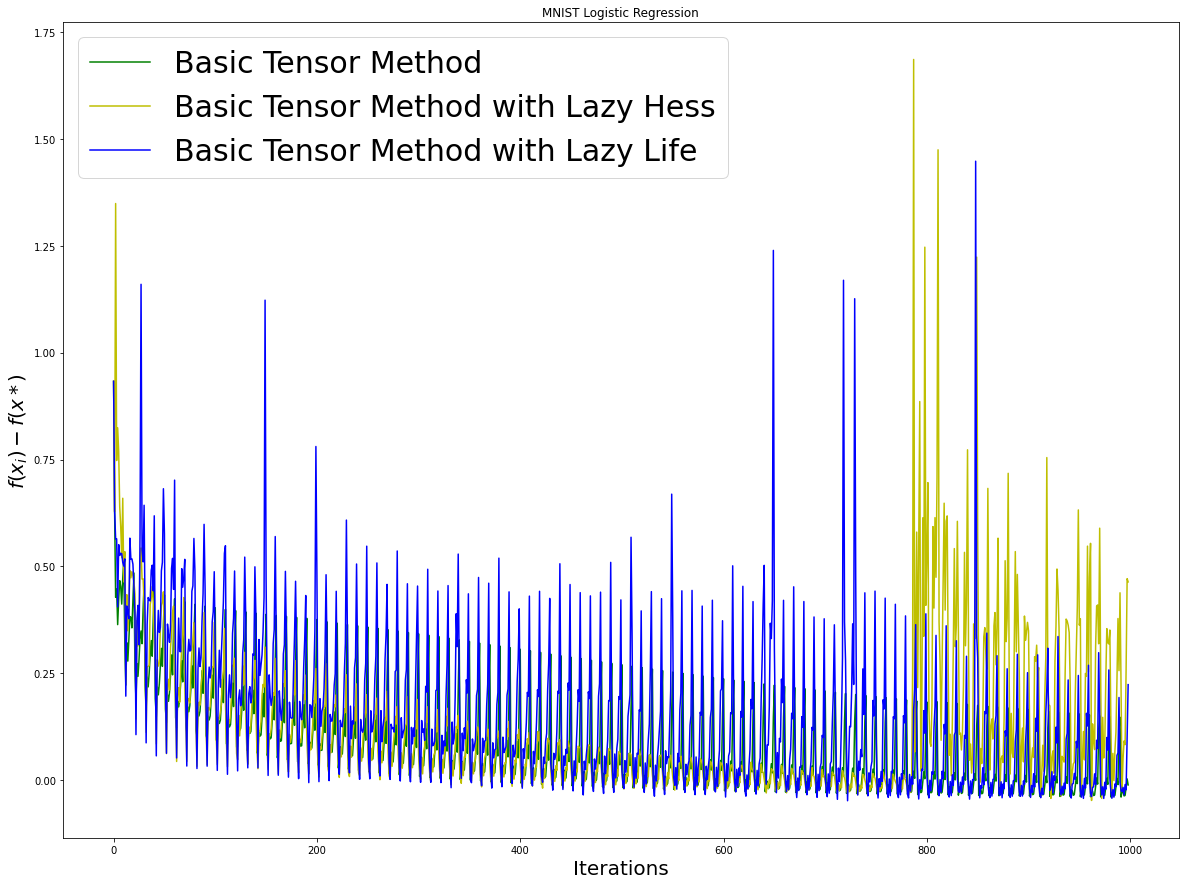

In [23]:
plt.figure(figsize=(20, 15))

# plt.plot(torch.tensor(loss_CRN[:-1]).sub(best).div(divis), 'b', label='Cubic Newton Method')
# plt.plot(torch.tensor(loss_CRN_lazy[:-1]).sub(best).div(divis), 'red', label='Cubic Newton Method Lazy')
plt.plot(torch.tensor(loss_BTM[:-1]).sub(best).div(divis), 'g', label='Basic Tensor Method')
plt.plot(torch.tensor(loss_BTM_lazy[:-1]).sub(best).div(divis), 'y', label='Basic Tensor Method with Lazy Hess')
plt.plot(torch.tensor(loss_BTM_very_lazy[:-1]).sub(best).div(divis), 'b', label='Basic Tensor Method with Lazy Life')
# plt.plot(torch.tensor(loss_Hyperfast[:-1]).sub(best).div(divis).log(), 'r',  label='Hyperfast method')
plt.xlabel('Iterations', fontsize=20)
plt.ylabel('$f(x_i)-f(x*)$', fontsize=20)
plt.legend(prop={'size': 30})
plt.title('MNIST Logistic Regression')
plt.savefig('MNIST')